In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
dir_name = '../daf_metric_results_folder_0817/{}DAF_TPCC_08172020/'
num_daf_threads = ['GC', 'Cooperative DAF', '1', '2', '4', '8']
# num_daf_threads = ['GC', 'Cooperative DAF', '1', '2']
# num_worker_threads = ['1', '4', '8', '12', '16', '20', '24', '28', '32', '36']
num_worker_threads = ['1', '4', '8', '12', '16', '20', '24', '28']
result_filename = '{}daf_{}worker_result.json'
coor_result_filename = '../coor_metric_results_folder/coor_{}worker_result.json'

# coor_result_filename = '../coor_metric_results_folder_0817/coor_{}worker_result.json'
ori_result_filename = '../gc_metric_results_folder/gc_{}worker_result.json'
output_format = 'pdf'

In [3]:
def read_daf_txns_per_second(num_daf_t, num_worker_t):
    try:
        with open(dir_name.format(num_daf_t) + result_filename.format(num_daf_t, num_worker_t)) as f:
            json_data = json.load(f)
        return json_data['benchmarks'][0]['items_per_second']    
    except IOError as error: 
        return np.nan
#     with open(dir_name.format(num_daf_t) + result_filename.format(num_daf_t, num_worker_t)) as f:
#         json_data = json.load(f)
#     return json_data['benchmarks'][0]['items_per_second']

In [4]:
def read_txns_per_second(filename, num_worker_t):
    with open(filename.format(num_worker_t)) as f:
        json_data = json.load(f)
    return json_data['benchmarks'][0]['items_per_second']

In [5]:
def change_font_sizes():
    plt.rc('font', size=6)          # controls default text sizes
    plt.rc('axes', titlesize=6)     # fontsize of the axes title
    plt.rc('axes', labelsize=6)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
    plt.rc('legend', fontsize=6)    # legend fontsize
    plt.rc('figure', titlesize=6)  # fontsize of the figure title

In [6]:
# read in num txns
ave_num_txns = [[0] * len(num_worker_threads) for _ in range(len(num_daf_threads))]
column_names = ['' for _ in range(len(num_daf_threads))]

i = 0
for daf_t in num_daf_threads:
    if i <= 1:
        column_names[i] = daf_t
    else:
        column_names[i] = '{} DAF Threads'.format(daf_t)
    j = 0
    for worker_t in num_worker_threads:
        if i == 0:
            ave_num_txns[i][j] = read_txns_per_second(ori_result_filename, worker_t)
        elif i == 1:
            ave_num_txns[i][j] = read_txns_per_second(coor_result_filename, worker_t)            
        else:
            ave_num_txns[i][j] = read_daf_txns_per_second(daf_t, worker_t)
        j += 1
    i += 1
df = pd.DataFrame(np.transpose(np.array(ave_num_txns)),columns=column_names)
df.insert(loc=0, column='num_worker_thread', value=num_worker_threads)
print(list(df.columns) )

['num_worker_thread', 'GC', 'Cooperative DAF', '1 DAF Threads', '2 DAF Threads', '4 DAF Threads', '8 DAF Threads']


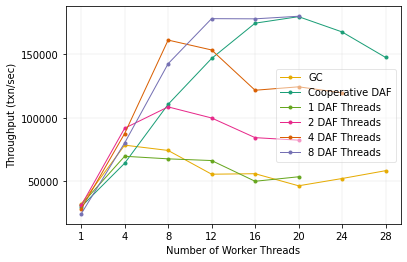

In [7]:
# draw only num_txns
# change_font_sizes()

# matches['GC', 'coordinate_daf', '1_daf_thread', '2_daf_thread', '4_daf_thread', '8_daf_thread']
colors = ['#e6ab02', '#1b9e77', '#66a61e', '#e7298a', '#d95f02', '#7570b3']

plt.locator_params(axis='y', nbins=5)
plt.grid(linestyle='-', linewidth='0.3', color='lightgrey')

i = 0
for col in column_names:
    plt.plot( 'num_worker_thread', col, data=df, marker='.', color=colors[i], linewidth=1.)
    i += 1
plt.xlabel('Number of Worker Threads')
plt.ylabel('Throughput (txn/sec)')
plt.legend(loc='best', ncol=1, framealpha=0.5)

# plt.legend(loc='lower left', bbox_to_anchor=(0., 1.02, 1., .102), fancybox=True, shadow=True, ncol=2, mode='expand', borderaxespad=0.)
# use below if y axis labels in scientific notations
# plt.legend(loc='lower left', bbox_to_anchor=(0.08, 1.02, 0.92, .102), fancybox=True, shadow=True, ncol=2, mode='expand', borderaxespad=0.)
plt.savefig('../metric_figures/per_sec_num_txns_comp_TPCC.' + output_format, format=output_format,  bbox_inches='tight', dpi=600)
# plt.clf()